In [7]:
from numpy import set_printoptions, logspace, mean, std
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import seaborn as sns

from decisiontree_assignment.descisionTree_hw_baseball_CMPE188 import X_train

In [8]:
filename = 'wine.csv'
# Column names added to csv including 'Class' as the first column/output variable
data = read_csv(filename)
set_printoptions(precision=3)
print(data.head(5))
print(data.isnull().sum())
print(f'{data.shape[0]} rows and {data.shape[1]} columns')
for column in data.columns:
    print(column)
    print(data[column].unique())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Use the Wine dataset (check under ML dataset Module on Canvas) and add an SV
Classifier(SVC), a random forest classifier with a depth of 2 and an Adaboost classifier
and compare them using kfold cross validation with k=10. For the SVC, use the default
settings given in the sample code, use RFB kernel with C = 1.0

In [9]:
# Standardize as all are continuous variables and appear mostly guassian
Y1 = data['Class']
data_stand = data.copy()
X1_stand = data.drop(columns=['Class'])
X1_stand = StandardScaler().fit(X1_stand).transform(X1_stand)

In [10]:
from matplotlib import pyplot

def evaluate_each_model_in_turn(models, X, Y):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    ## boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()

SVC Accuracy: 1.0000
Random Forest Accuracy: 1.0000
AdaBoost Accuracy: 0.9444
SVC: 0.978571 (0.045737)
Random Forest: 0.964286 (0.047916)
AdaBoost: 0.957143 (0.057143)


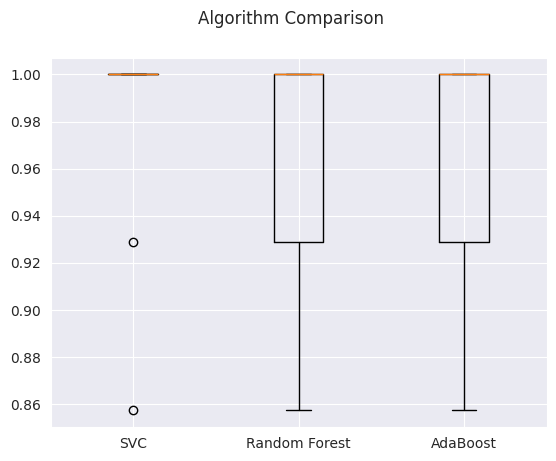

In [19]:
# add an SV Classifier(SVC), a random forest classifier with a depth of 2 and an Adaboost
# classifier and compare them using kfold cross validation with k=10. For the SVC, use
# the default settings given in the sample code, use RFB kernel with C = 1.0
models = []
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
svc_model = ('SVC', SVC(kernel='rbf', C=1.0, random_state=1))
models.append(svc_model)
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=1)))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1_stand, Y1, test_size=0.2)

# fit all models
accuracy_dict = {}
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, Y_test)
    accuracy_dict[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

evaluate_each_model_in_turn(models, X_train, Y_train)

SVC: 0.985714 (0.028571)
Poly SVC: 0.894286 (0.071200)


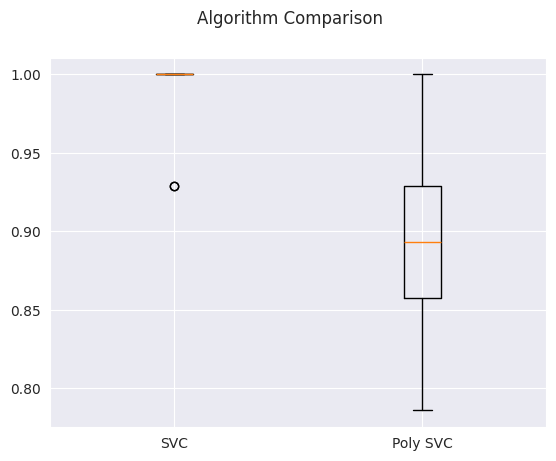

In [14]:
# Polynomial kernel with kernel degree 2
poly_svc_model = ('Poly SVC', SVC(kernel='poly', degree=2, C=1.0, random_state=1))
compare_svc_models = [svc_model, poly_svc_model]
evaluate_each_model_in_turn(compare_svc_models, X_train, Y_train)

In [21]:
models.append(poly_svc_model)
# Plot the multi-class ROC curve and use the roc_auc_score function to calculate ROC
# AUC for each class.
from sklearn.metrics import roc_curve, roc_auc_score

y_scores_dict = {}
for name, model in models:
    y_scores = model.predict_proba(X_test)
    y_scores_dict[name] = y_scores
    print(f"{name} ROC AUC Score: {roc_auc_score(Y_test, y_scores[:, 1]):.4f}")

# plot roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.figure()
    plot_roc_curve(fpr, tpr)
    plt.show()

def calculate_roc_auc_score(y_true, y_score):
    return roc_auc_score(y_true, y_score)

# plotting the ROC curve for each class and display the AUC score below
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:, 1], pos_label=1)
plot_roc_curve(fpr, tpr, label='SVC')

AttributeError: This 'SVC' has no attribute 'predict_proba'